In [4]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [5]:
merge_meso_2019 = pd.read_csv('../merged/merged_meso_2019.csv', parse_dates=['DATE'])

In [6]:
del merge_meso_2019['TVS_max']

In [7]:
cols= merge_meso_2019.columns.tolist()

In [8]:
cols

['Unnamed: 0',
 'index',
 'DATE',
 'LAT_mean',
 'LON_mean',
 'STR_RANK_max',
 'LL_ROT_VEL_max',
 'LL_DV_max',
 'LL_BASE_max',
 'DEPTH_KFT_max',
 'DPTH_STMRL_max',
 'MAX_RV_KFT_max',
 'MAX_RV_KTS_max',
 'MSI_max',
 'county',
 'state',
 'power_outage']

In [9]:
corr_matrix = merge_meso_2019[cols[6:14]].corr()

<Axes: >

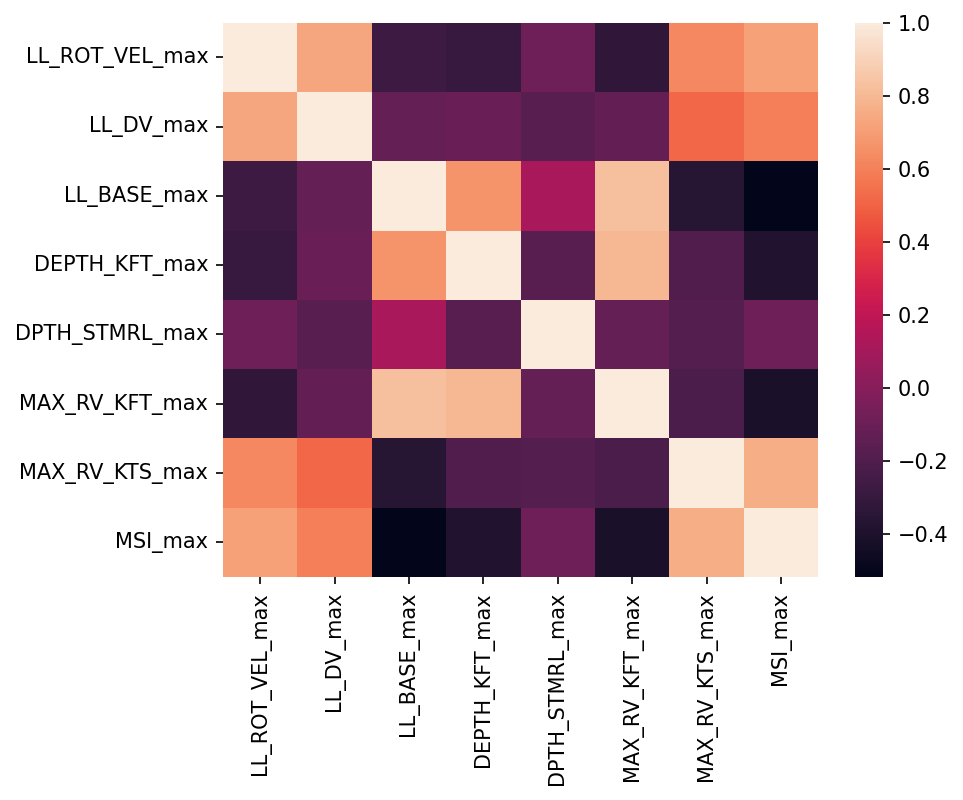

In [10]:
sns.heatmap(corr_matrix)

In [11]:
bydate_withoutage = merge_meso_2019[merge_meso_2019.power_outage].groupby('DATE')['DATE'].count()
bydate_all = merge_meso_2019.groupby('DATE')['DATE'].count()

In [12]:
bydate_withoutage.index

DatetimeIndex(['2019-01-06', '2019-01-12', '2019-01-13', '2019-01-16',
               '2019-03-13', '2019-04-07', '2019-04-13', '2019-04-15',
               '2019-04-18', '2019-04-26', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-18', '2019-05-23', '2019-05-24',
               '2019-05-27', '2019-06-02', '2019-06-06', '2019-06-09',
               '2019-06-16', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-30',
               '2019-07-10', '2019-07-13', '2019-07-19', '2019-07-20',
               '2019-07-22', '2019-07-23', '2019-07-30', '2019-08-08',
               '2019-08-15', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-11', '2019-10-17', '2019-10-20', '2019-10-26',
               '2019-10-31', '2019-11-01', '2019-11-20', '2019-11-26',
               '2019-11-27'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [13]:
dates_withoutage, counts_withoutage = bydate_withoutage.index, np.array(bydate_withoutage)
dates_all, counts_all = bydate_all.index, np.array(bydate_all)

Text(0, 0.5, 'number of events')

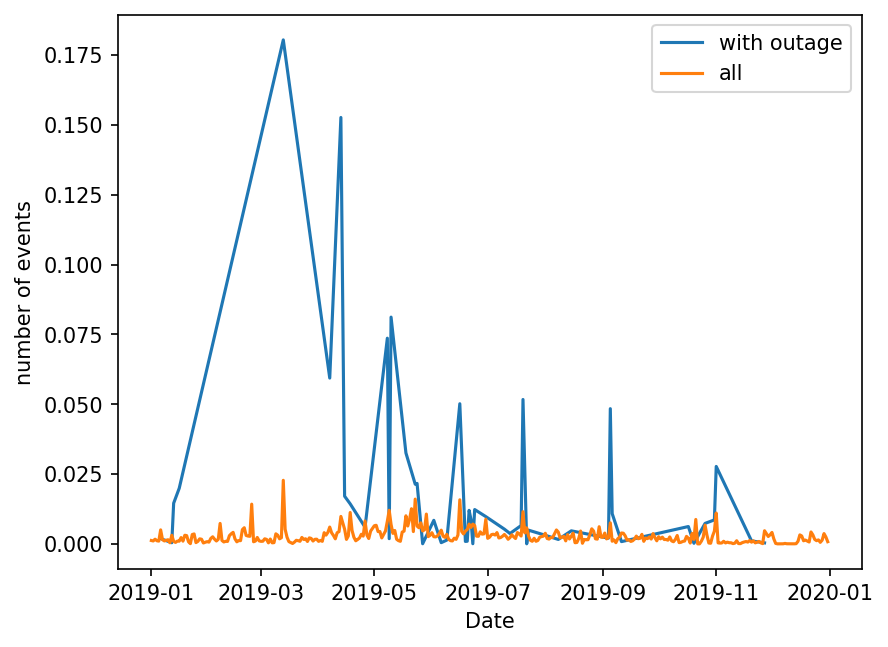

In [14]:
plt.plot(dates_withoutage, counts_withoutage/np.sum(counts_withoutage), label='with outage')
plt.plot(dates_all, counts_all/np.sum(counts_all), label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('number of events')

Text(0, 0.5, 'normalized number of events')

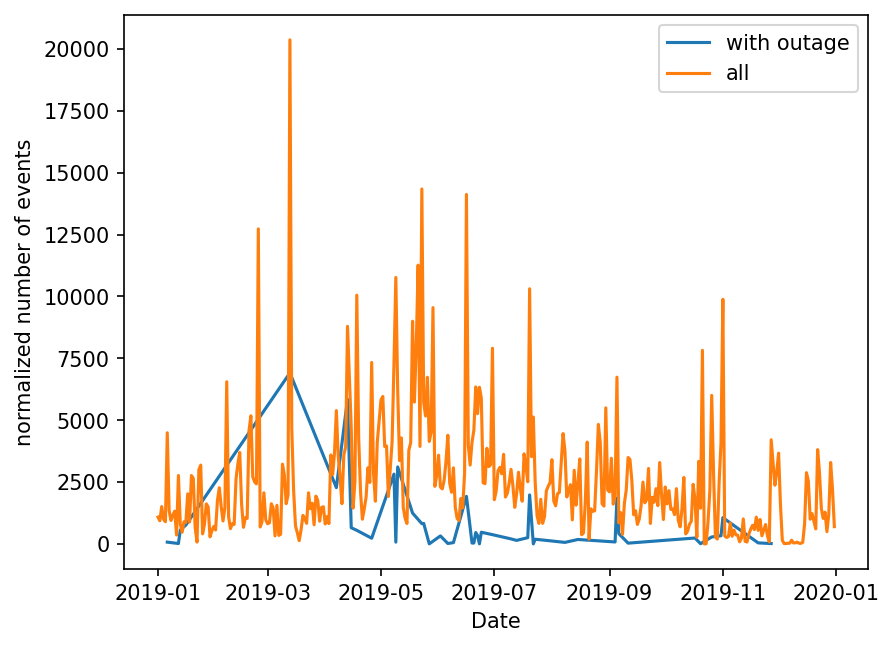

In [15]:
plt.plot(dates_withoutage, counts_withoutage, label='with outage')
plt.plot(dates_all, counts_all, label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('normalized number of events')

In [16]:
merge_meso_2019.head()

,Unnamed: 0,index,DATE,LAT_mean,LON_mean,STR_RANK_max,LL_ROT_VEL_max,LL_DV_max,LL_BASE_max,DEPTH_KFT_max,DPTH_STMRL_max,MAX_RV_KFT_max,MAX_RV_KTS_max,MSI_max,county,state,power_outage
0,0,0,2019-01-01,35.30391,-106.70199,9,52,61,14,12,100,24,63,5559,Sandoval County,New Mexico,False
1,1,1,2019-01-01,35.79095,-106.68525,6L,35,44,7,12,100,11,46,3419,Sandoval County,New Mexico,False
2,2,2,2019-01-01,35.35228,-106.68135,5L,33,47,9,8,100,16,62,4740,Sandoval County,New Mexico,False
3,3,3,2019-01-01,34.96357,-107.08421,5L,31,43,9,4,100,12,46,3480,Cibola County,New Mexico,False
4,4,4,2019-01-01,35.44015,-106.72896,5L,40,45,10,3,100,10,40,2431,Sandoval County,New Mexico,False


In [17]:
outage = merge_meso_2019[merge_meso_2019['power_outage']==True]
no_outage = merge_meso_2019[merge_meso_2019['power_outage']==False]

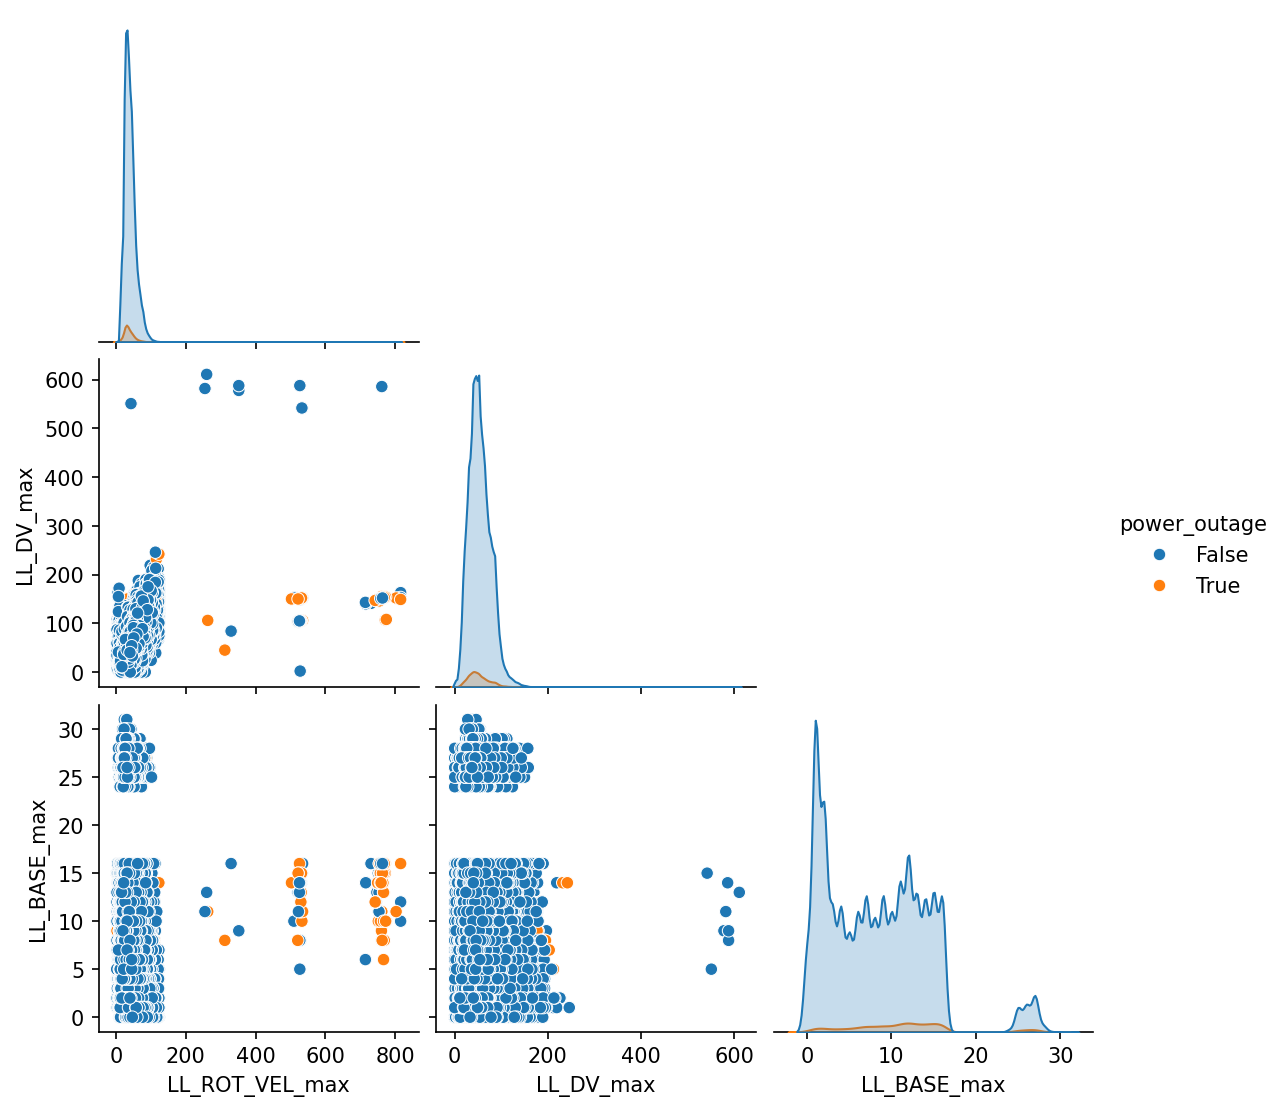

In [18]:
sns.pairplot(merge_meso_2019, x_vars=['LL_ROT_VEL_max', 'LL_DV_max','LL_BASE_max'], y_vars=['LL_ROT_VEL_max', 'LL_DV_max','LL_BASE_max'], hue='power_outage', corner=True)

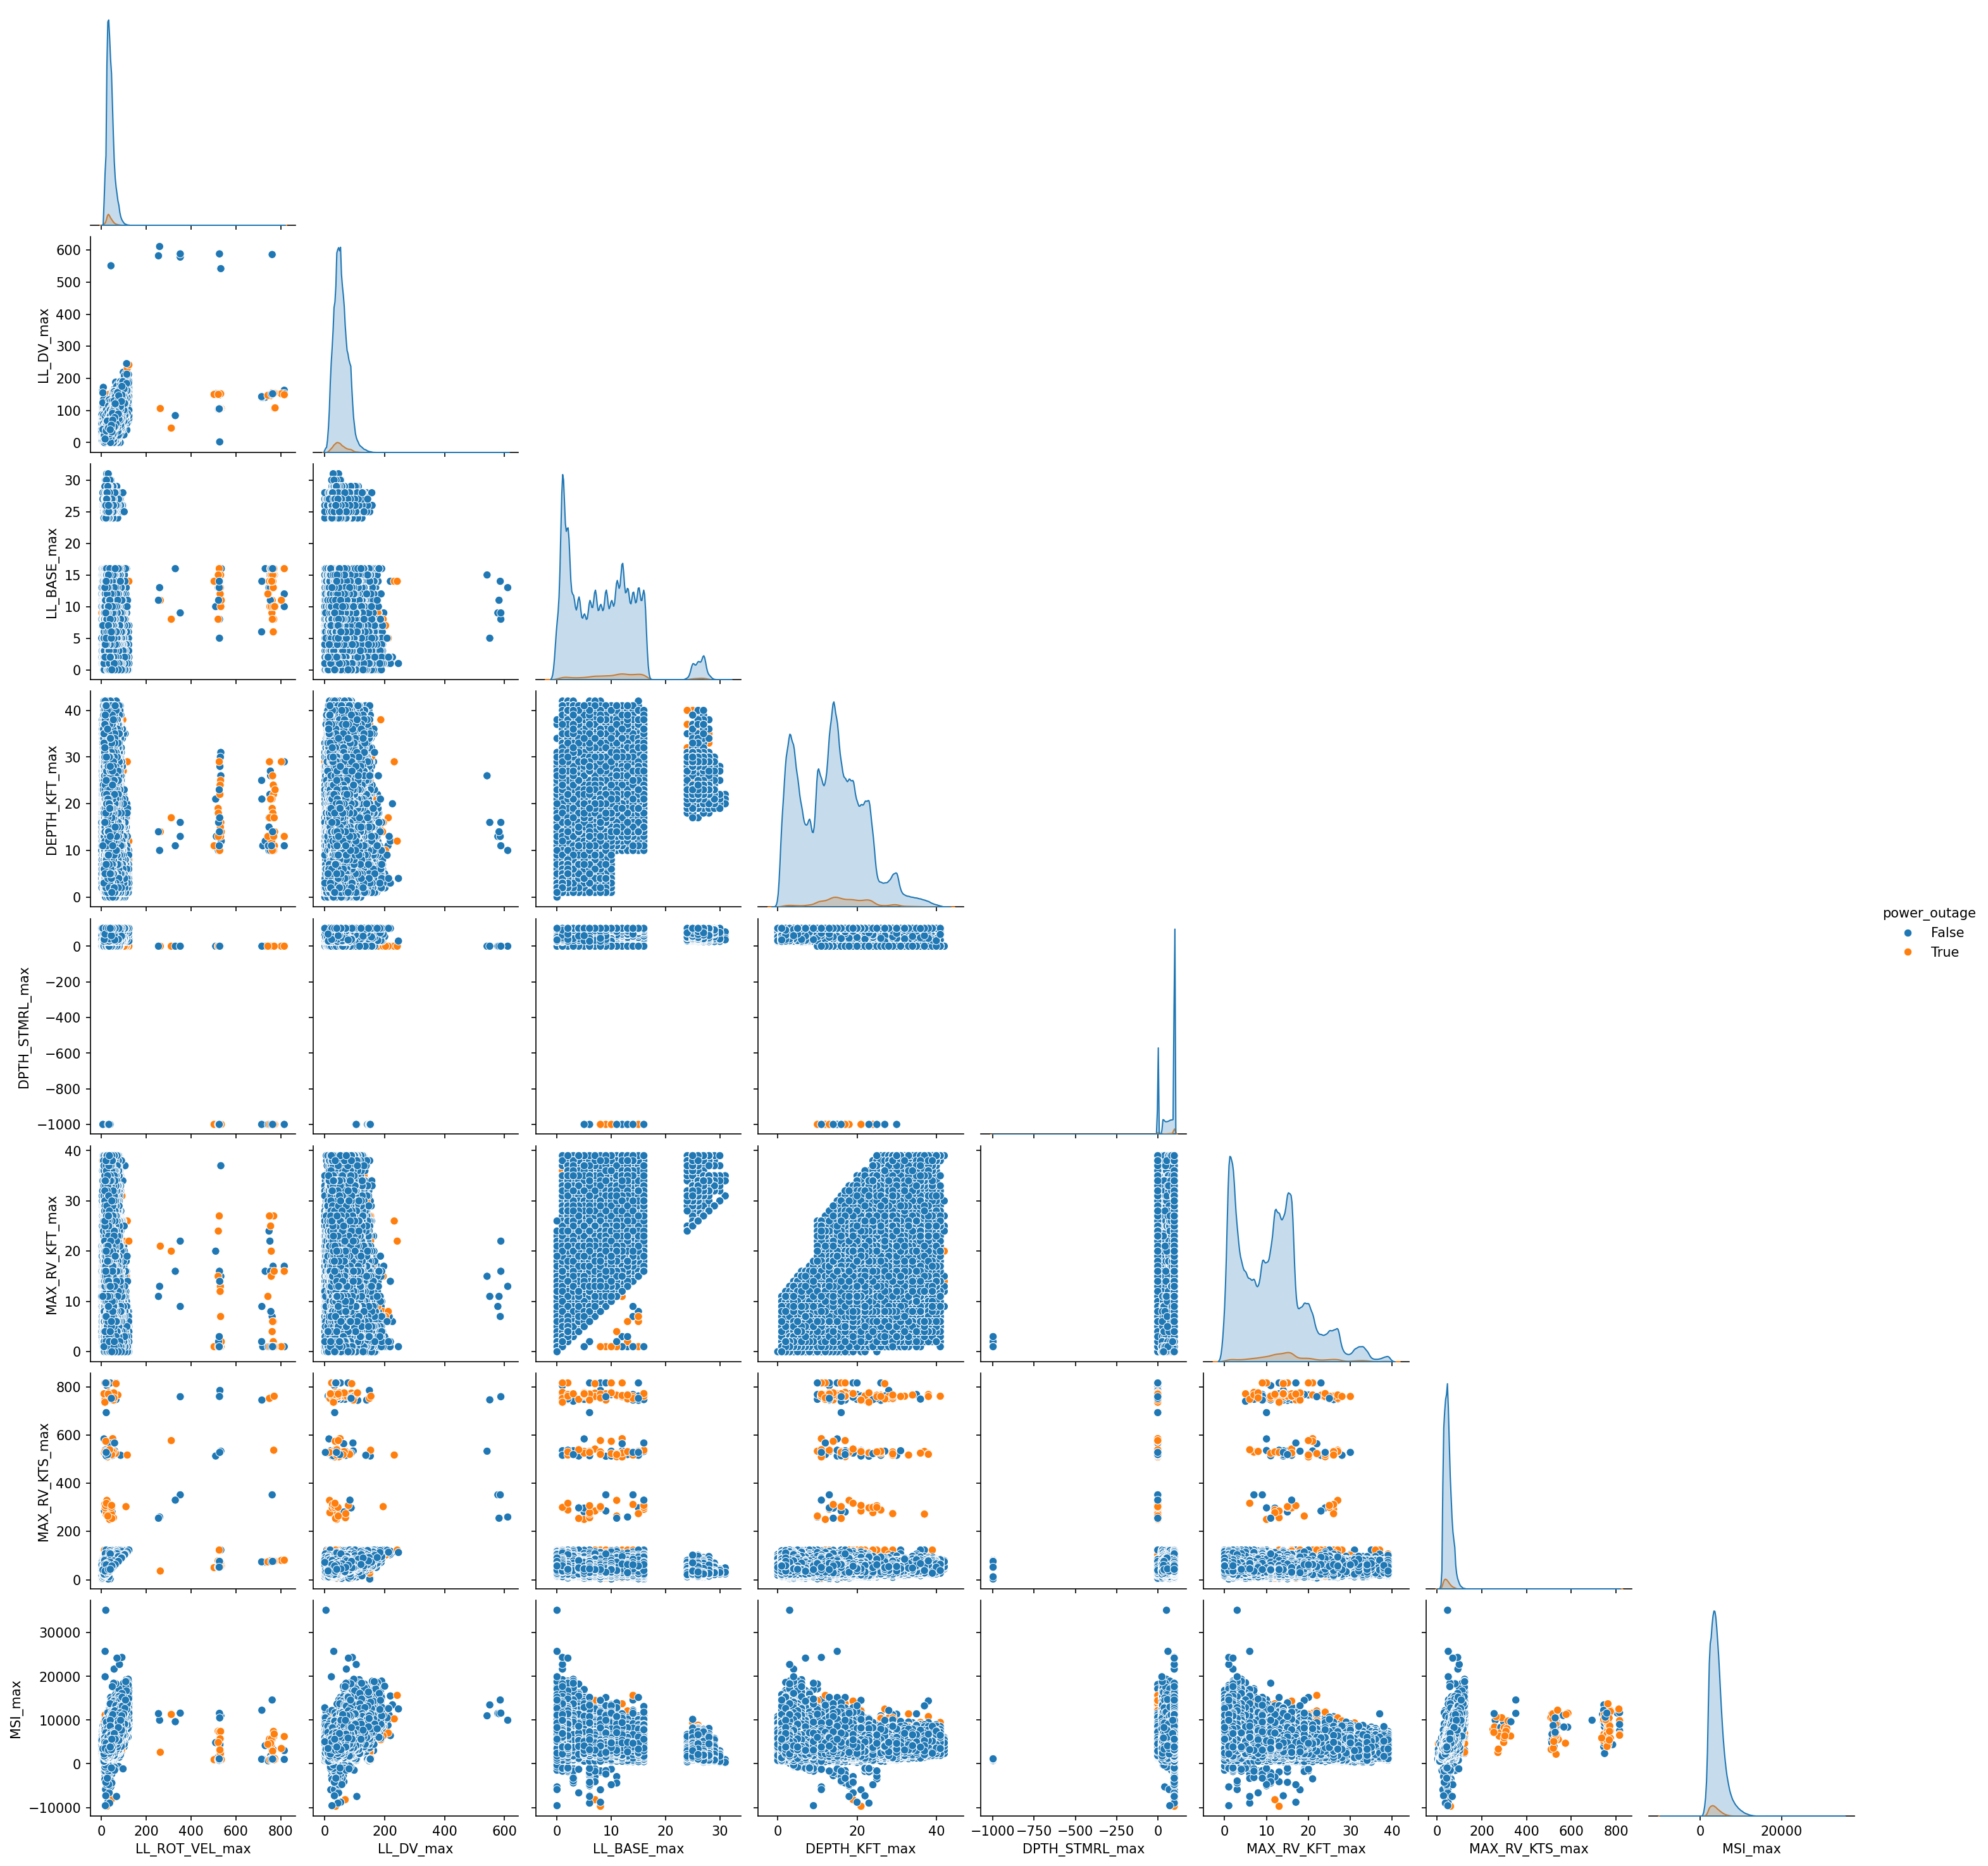

In [19]:
sns.pairplot(merge_meso_2019, x_vars=['LL_ROT_VEL_max', 'LL_DV_max','LL_BASE_max','DEPTH_KFT_max','DPTH_STMRL_max','MAX_RV_KFT_max','MAX_RV_KTS_max','MSI_max'], y_vars=['LL_ROT_VEL_max', 'LL_DV_max','LL_BASE_max','DEPTH_KFT_max','DPTH_STMRL_max','MAX_RV_KFT_max','MAX_RV_KTS_max','MSI_max'], hue='power_outage', corner=True)